# Task-1: Loan repay prediction using bank data.
1.Download bank dataset-
https://drive.google.com/open?id=1vHVyDJz6AJFg2lCLjNaijdPGbiSh5DWu
2.Develop a binomial  logistic regression using single attribute “age”
Observe all parameters (Null Deviance, Residual deviance, P value, Fisher score, AIC , Degree of freedom)
3.Develop a binomial  logistic regression using two  attribute “age + salary”
Observe changes in all parameters (Null Deviance, Residual deviance, P value, Fisher score, AIC , Degree of freedom)

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_csv('bank1.csv')
print(df.head())
print(df.shape)
df.describe(include='all')

   age  salary  repaid
0   70      55       1
1   96      51       1
2   86      71       1
3   87      67       1
4   77      87       1
(2952, 3)


,age,salary,repaid
count,2952.000000,2952.00000,2952.000000
mean,64.475271,65.01355,0.685637
std,20.705010,21.74503,0.464340
min,9.000000,-14.00000,0.000000
25%,52.000000,52.00000,0.000000
50%,65.000000,65.00000,1.000000
75%,81.000000,79.00000,1.000000
max,99.000000,133.00000,1.000000


1    2024
0     928
Name: repaid, dtype: int64
percentage of Not Repaid is  31.43631436314363
percentage of Repaid is 68.56368563685636


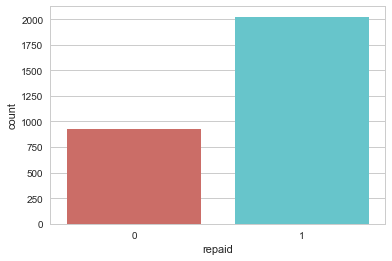

In [3]:
print(df.repaid.value_counts())

sns.countplot(x=df.repaid,palette='hls')
NoRepaid = len(df[df['repaid']==0])
Repaid = len(df[df['repaid']==1])
percentofNoRepaid = NoRepaid/(NoRepaid+Repaid)
print("percentage of Not Repaid is ", percentofNoRepaid*100)
percentRepaid = Repaid/(NoRepaid+Repaid)
print("percentage of Repaid is", percentRepaid*100)


In [4]:
print(df.groupby(df.repaid).mean())

              age     salary
repaid                      
0       46.528017  53.391164
1       72.704051  70.342391


In [5]:
X = df.iloc[:,df.columns!='repaid']
y = df.iloc[:,df.columns=='repaid']

import statsmodels.api as sm

Model = sm.Logit(y,X)
Model = Model.fit()
print(Model.summary())
print(Model.summary2())

Optimization terminated successfully.
         Current function value: 0.547991
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 repaid   No. Observations:                 2952
Model:                          Logit   Df Residuals:                     2950
Method:                           MLE   Df Model:                            1
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                  0.1198
Time:                        15:50:26   Log-Likelihood:                -1617.7
converged:                       True   LL-Null:                       -1837.8
                                        LLR p-value:                 9.877e-98
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0203      0.001     13.651      0.000       0.017       0.023
salary        -0.0028      0.

In [6]:
#Implenting the model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
y_pred = logreg.predict(X_test)
q=pd.DataFrame(y_pred,columns=['Predicted'])
print(q.Predicted.value_counts())
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

1    629
0    257
Name: Predicted, dtype: int64
Accuracy of logistic regression classifier on test set: 0.88


[[213  61]
 [ 44 568]]


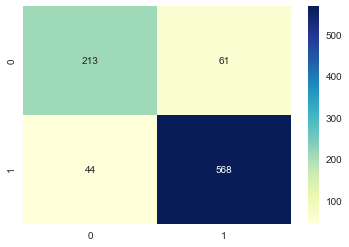

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

sns.heatmap(confusion_matrix,annot=True, cmap="YlGnBu" ,fmt='g')

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.78      0.80       274
          1       0.90      0.93      0.92       612

avg / total       0.88      0.88      0.88       886

